In [1]:
##importing dependecies

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [3]:
loan_data=pd.read_csv("/content/drive/MyDrive/ML_Dataset/train_loan_approval.csv")

In [4]:
loan_data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan_data.shape

(614, 13)

In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


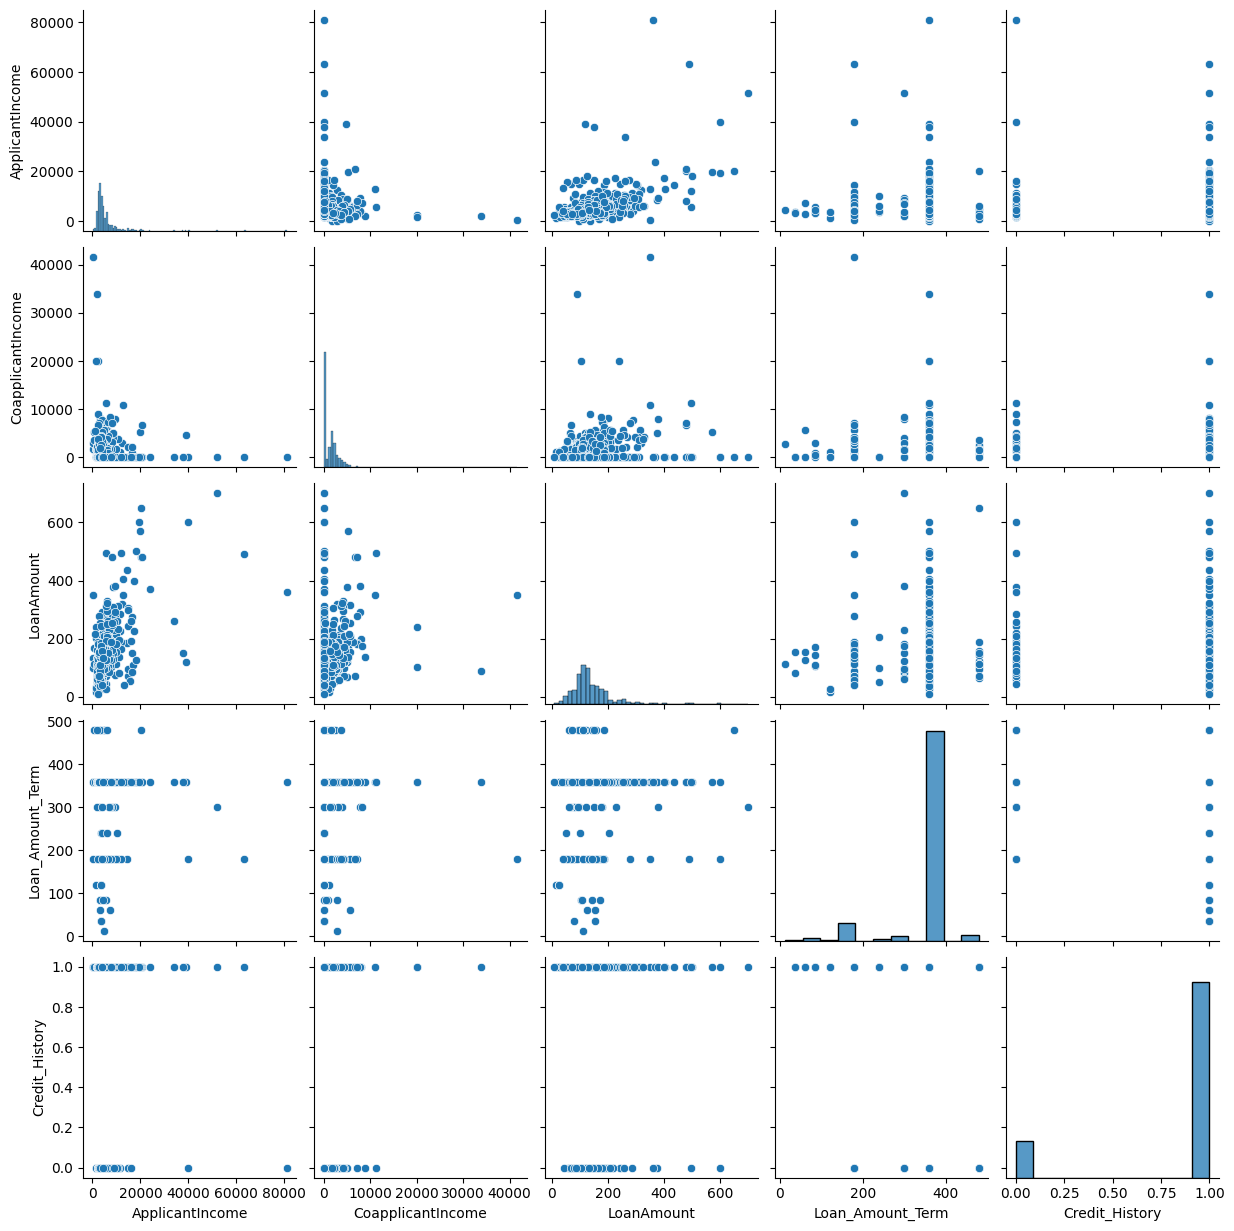

In [7]:
sns.pairplot(loan_data)

<Axes: >

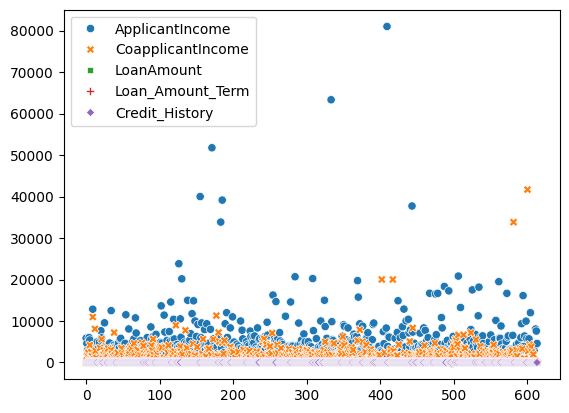

In [8]:
sns.scatterplot(loan_data)

In [9]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#drop all the null value
loan_data=loan_data.dropna()

In [11]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [13]:
loan_data.corr()

<ipython-input-13-25c50d323e1e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_data.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000


<ipython-input-14-08939582bdd7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loan_data.corr(), annot=True, fmt=".0%")


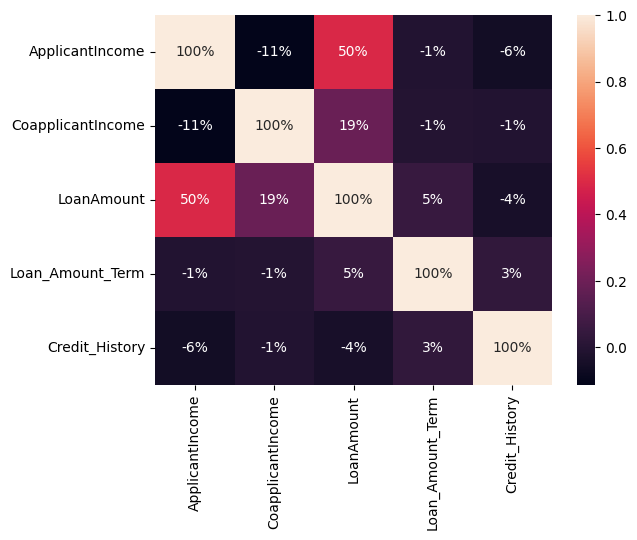

In [14]:
sns.heatmap(loan_data.corr(), annot=True, fmt=".0%")
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

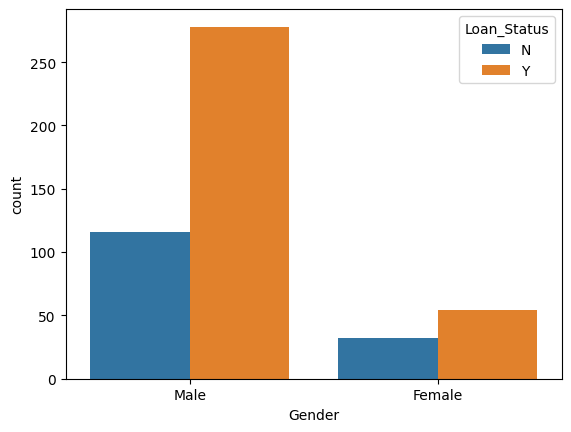

In [15]:
sns.countplot(loan_data,x='Gender',hue="Loan_Status")

<Axes: xlabel='Married', ylabel='count'>

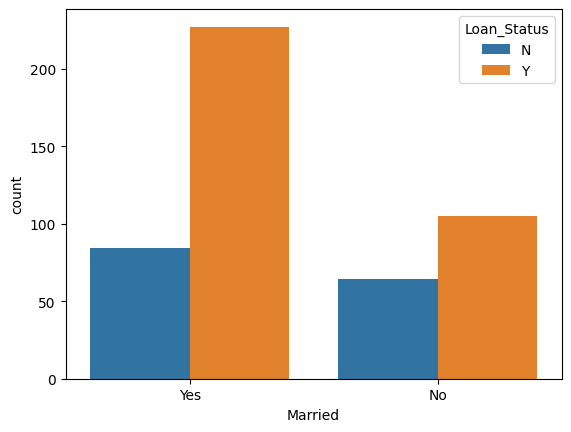

In [16]:
sns.countplot(loan_data,x='Married',hue="Loan_Status")

<Axes: xlabel='Dependents', ylabel='count'>

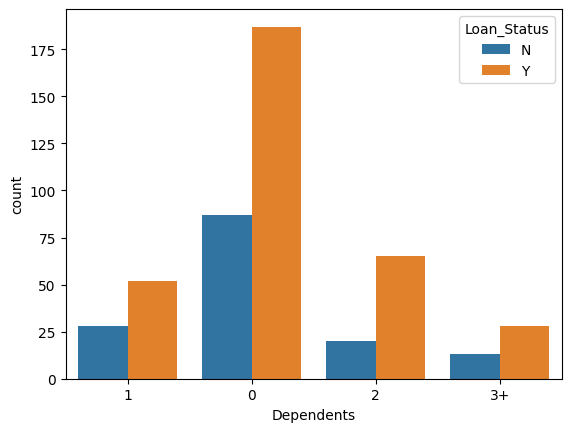

In [17]:
sns.countplot(loan_data,x='Dependents',hue="Loan_Status")

<Axes: xlabel='Education', ylabel='count'>

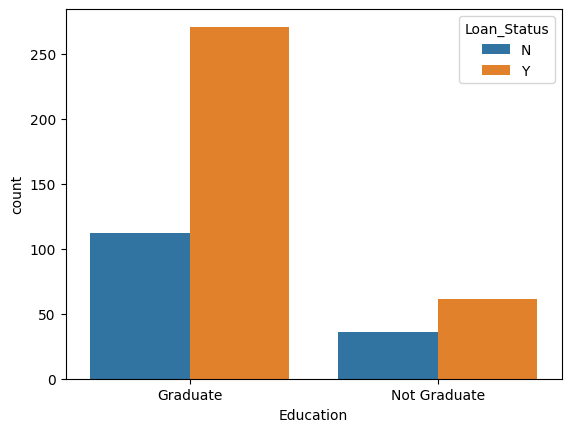

In [18]:
sns.countplot(loan_data,x='Education',hue="Loan_Status")

<Axes: xlabel='Self_Employed', ylabel='count'>

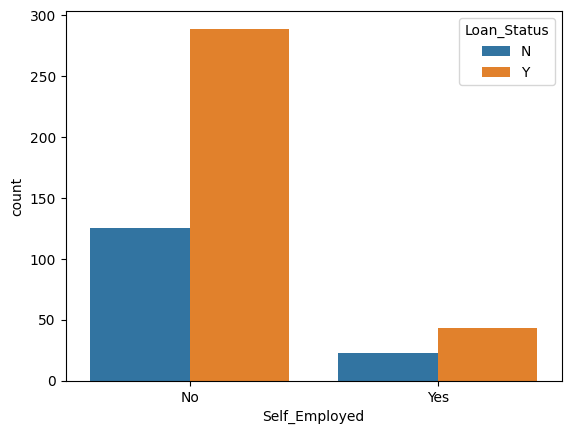

In [19]:
sns.countplot(loan_data,x='Self_Employed',hue="Loan_Status")

<Axes: xlabel='ApplicantIncome', ylabel='count'>

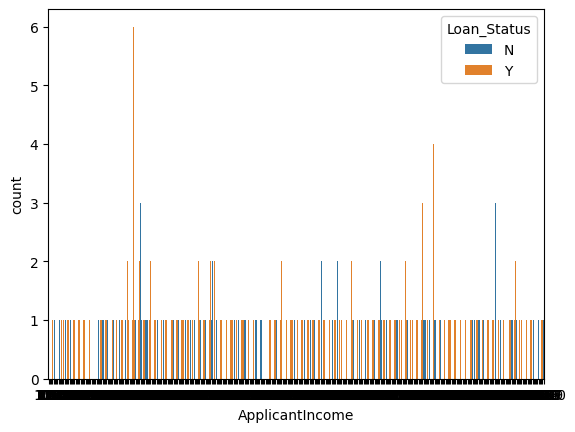

In [20]:
sns.countplot(loan_data,x='ApplicantIncome',hue="Loan_Status")

<Axes: xlabel='CoapplicantIncome', ylabel='count'>

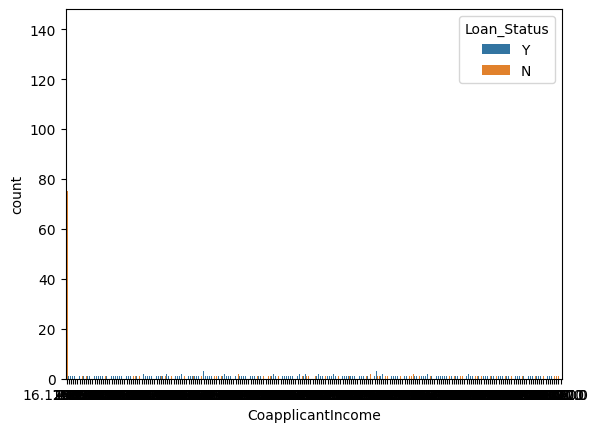

In [21]:
sns.countplot(loan_data,x='CoapplicantIncome',hue="Loan_Status")

<Axes: xlabel='LoanAmount', ylabel='count'>

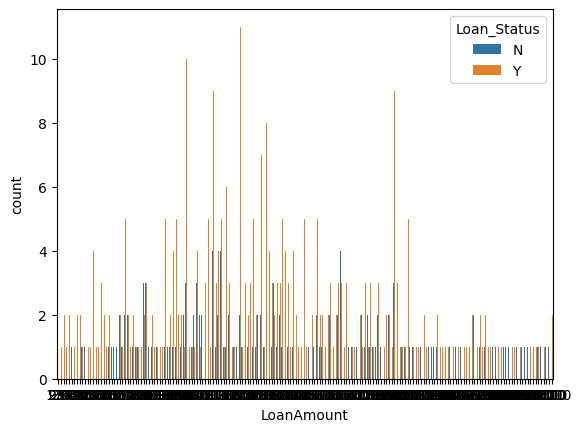

In [22]:
sns.countplot(loan_data,x='LoanAmount',hue="Loan_Status")

<Axes: xlabel='LoanAmount', ylabel='Count'>

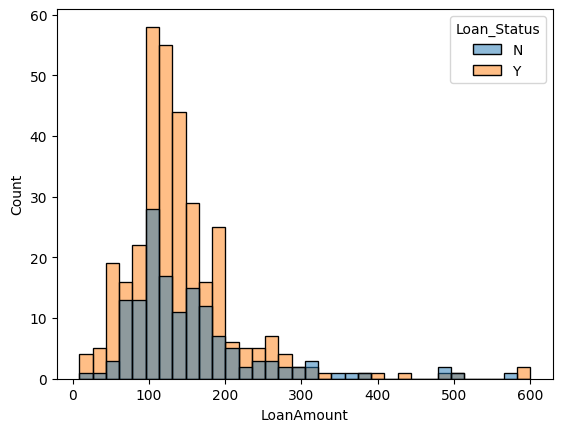

In [23]:
sns.histplot(loan_data,x='LoanAmount',hue='Loan_Status')

In [24]:
loan_data.Property_Area.unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [25]:
loan_data.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [26]:
#label encoding
loan_data.replace({'Gender':{'Male':0,'Female':1},'Married':{'Yes':1,'No':0},'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Urban':2,'Semiurban':1,'Rural':0},'Loan_Status':{'Y':1,'N':0}},inplace=True)

<ipython-input-26-9ea1d4381fd8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data.replace({'Gender':{'Male':0,'Female':1},'Married':{'Yes':1,'No':0},'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Urban':2,'Semiurban':1,'Rural':0},'Loan_Status':{'Y':1,'N':0}},inplace=True)


<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

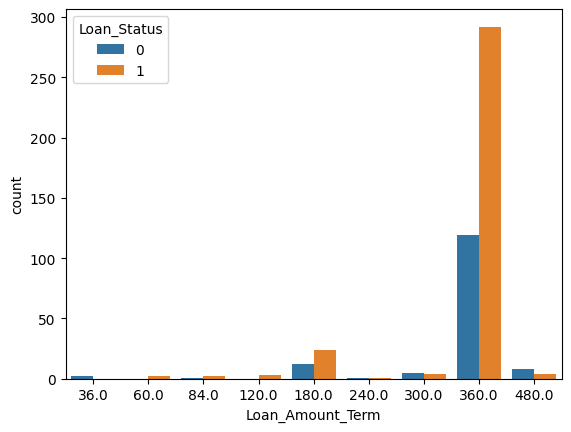

In [27]:
sns.countplot(loan_data,x='Loan_Amount_Term',hue="Loan_Status")

In [28]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [29]:
loan_data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [30]:
loan_data.replace({'Dependents':{"3+":4}},inplace=True)

<ipython-input-30-bd884e0a8378>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data.replace({'Dependents':{"3+":4}},inplace=True)


In [31]:
X=loan_data.drop(columns=['Loan_ID','Loan_Status'])

In [32]:
Y=loan_data['Loan_Status']

In [33]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2


In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler=StandardScaler()

In [36]:
scaler.fit(X)

StandardScaler()

In [37]:
scaler.transform(X)

array([[-0.46719815,  0.73716237,  0.11235219, ...,  0.27554157,
         0.41319694, -1.31886834],
       [-0.46719815,  0.73716237, -0.70475462, ...,  0.27554157,
         0.41319694,  1.25977445],
       [-0.46719815,  0.73716237, -0.70475462, ...,  0.27554157,
         0.41319694,  1.25977445],
       ...,
       [-0.46719815,  0.73716237,  0.11235219, ...,  0.27554157,
         0.41319694,  1.25977445],
       [-0.46719815,  0.73716237,  0.92945899, ...,  0.27554157,
         0.41319694,  1.25977445],
       [ 2.14041943, -1.35655324, -0.70475462, ...,  0.27554157,
        -2.42015348, -0.02954695]])

In [38]:
Y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int64

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [40]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(321, 11) (159, 11) (321,) (159,)


In [41]:
classifier=SVC(kernel='linear')

In [42]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
X_train_pred=classifier.predict(X_train)

In [45]:
trainning_score=accuracy_score(X_train_pred,Y_train)

In [46]:
trainning_score

0.7757009345794392

In [47]:
X_test_pred=classifier.predict(X_test)

In [48]:
test_score=accuracy_score(X_test_pred,Y_test)

In [49]:
test_score

0.7672955974842768